### Load libraries

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap, shiftgrid, interp, addcyclic
import scipy.io
from scipy.interpolate import griddata
import datetime
#from pylab import *
import numpy.ma as ma
from glob import glob
#from matplotlib.mlab import griddata
#from pylab import *

#import osgeo
#import gdal

from numpy import nan


import string
from scipy import stats
import matplotlib as mpl
import scipy.ndimage as ndimage
from netCDF4 import Dataset
from scipy import signal

import datetime as dt



### TOPAZ + Depth 

In [4]:
#TOPAZ/TOPAZ_v4/topaz_V4_myocean_arctic_grid1to8_da_class1_19990915.nc  
filepath='/Users/micheltsamados/Google Drive/PAPER_NOEL/TOPAZ/TOPAZ_v4/'
data1=Dataset(filepath+'topaz_V4_myocean_arctic_grid1to8_da_class1_19990915.nc',"r")        
lon_TOPAZ=data1.variables['longitude'][:,:]
lat_TOPAZ=data1.variables['latitude'][:,:]
depth=data1.variables['model_depth'][:,:]

### GEBCO Depth

### SST from ERA-I

In [5]:
#Read values

#xvals = lon
#yvals = lat
moda = []
#moda = [[] for i in range(3)]
#mdfa = [[] for i in range(3)]
#Issues with grid_2 and grid_5
k=-1
for n in [1990,2000,2010]:
    #k=k+1
    i='%03d' % (n)
    print(i)
    #moda[n]=[]
    #mdfa[n]=[]
    moda.append(Dataset('ERA-i/era_interim_moda_'+i+'.nc',"r"))
#     moda[k].append(Dataset('ERA-i/era_interim_moda_'+i+'.nc',"r"))
#    moda[n].append(Dataset('ERA-i/era_interim_moda_'+i+'.nc',"r"))
    #mdfa[n].append(Dataset('ERA-i/era_interim_mdfa_'+i+'.nc',"r"))

1990
2000
2010


In [7]:
#Concatenate lists 1990 + 2000 + 2010s
moda[2]['sst'].shape
#subset_moda[1][0]['t2m'].shape
sst_array=np.concatenate(np.array((moda[0]['sst'],moda[1]['sst'],moda[2]['sst'])))
#print(t2m_array.shape)
#Calculate t2m_season
#t2m_season=ma.masked_array((4,28,241,480))
sst_season=[]
for i in range(4):
    sst_season.append((sst_array[0+i*3:336:12]+sst_array[1+i*3:336:12]+sst_array[2+i*3:336:12])/3.)

In [13]:
#Interpolate on ERA-I grid
#mapC = Basemap(projection='stere', lon_0=-45, lat_0=90, lat_ts=70, 
#        urcrnrlat=31.37 , urcrnrlon=102.34, llcrnrlat=33.92,  llcrnrlon=279.26)
m = Basemap(width=6000000,height=4000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
t=0
xtest, ytest = m(lon_TOPAZ, lat_TOPAZ)
lon, lat = np.meshgrid(moda[0]['longitude'],moda[0]['latitude'])
sst_out,lat_out,lon_out=addcyclic(sst_array[t][::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
#x, y = m(lon, lat)
depth_ERAI_nn=griddata((xtest.ravel(), ytest.ravel()),depth.ravel(), (x, y), method='nearest')

In [18]:
print(sst_out.shape)
depth_ERAI_nn.shape

(241, 481)


(241, 481)

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

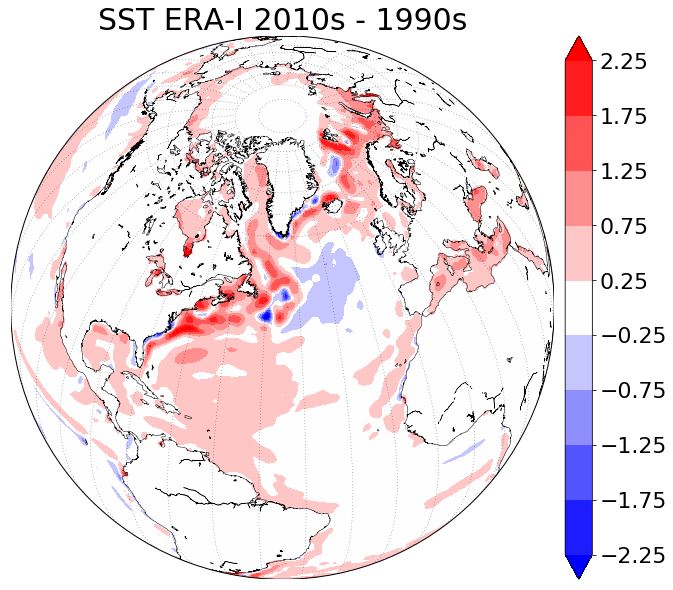

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<Figure size 432x288 with 0 Axes>

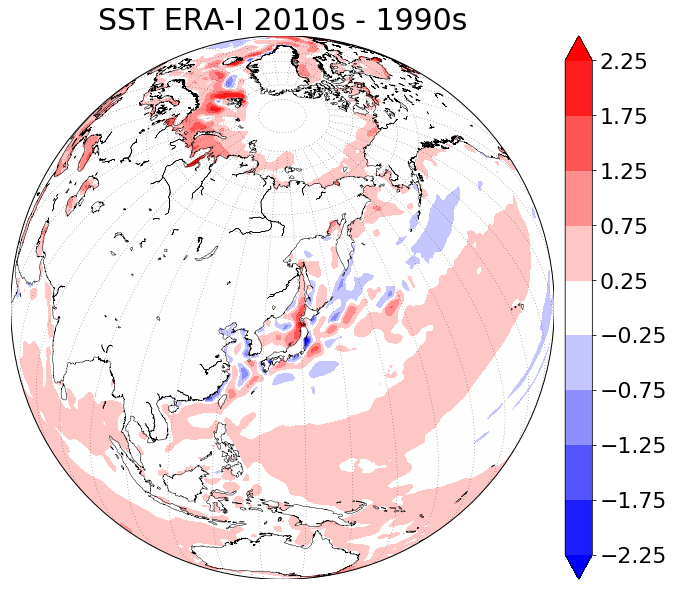

In [20]:
#Plot yearly average 
from matplotlib import cm, rcParams
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.clf()
plt.figure(figsize=(15,10))
m = Basemap(projection='ortho',lat_0=45,lon_0=-45,resolution='l')

#m = Basemap(width=6000000,height=4000000,
#            rsphere=(6378137.00,6356752.3142),\
#            resolution='l',area_thresh=1000.,projection='lcc',\
#            lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
#t=12*(20-1)+7
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=0.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
llevels = np.arange(-2000,0,250) # check etopo.ravel().max()
#CS=m.contour(x, y, -depth_ERAI_nn, vmin=-8000, vmax=0,levels=llevels,colors='k', linestyles='-',alpha=0.1)
#diff=np.mean(sst_array[120:240:1],0)-np.mean(sst_array[0:120:1],0) #2000s - 1990s
#diff=np.mean(sst_array[240:336:1],0)-np.mean(sst_array[120:240:1],0) #2010s - 2000s
diff=np.mean(sst_array[240:336:1],0)-np.mean(sst_array[0:120:1],0) #2010s - 2000s

lon, lat = np.meshgrid(moda[0]['longitude'],moda[0]['latitude'])
sst_out,lat_out,lon_out=addcyclic(diff[::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
my_cmap=plt.cm.bwr
my_cmap_r = reverse_colourmap(my_cmap)
#CS=m.pcolormesh(x, y, sst_out, vmin=-2, vmax=+2,cmap=my_cmap)
CS=m.contourf(x, y, sst_out, levels=[-2.25, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25], extend='both', vmin=-2.25, vmax=+2.25,cmap=my_cmap)
#CS=m.contourf(x, y, sst_out, levels=[-2.25, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25], extend='both', vmin=-2.25, vmax=+2.25,cmap=my_cmap)
m.colorbar()
plt.rcParams.update({'font.size': 22})
#plt.title('SST ERA-I 2010s - 2000s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-2000s_contour.png', dpi=100)
#plt.title('SST ERA-I 2000s - 1990s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2000s-1990s_contour.png', dpi=100)
plt.title('SST ERA-I 2010s - 1990s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()


#Plot yearly average 
from matplotlib import cm, rcParams
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.clf()
plt.figure(figsize=(15,10))
m = Basemap(projection='ortho',lat_0=45,lon_0=135,resolution='l')

#m = Basemap(width=6000000,height=4000000,
#            rsphere=(6378137.00,6356752.3142),\
#            resolution='l',area_thresh=1000.,projection='lcc',\
#            lat_1=55.,lat_2=85,lat_0=80,lon_0=0.)
#t=12*(20-1)+7
m.drawcoastlines(linewidth = 0.5)
m.fillcontinents(color='grey',alpha=0.)#,lake_color='aqua')
m.drawparallels(np.arange(60,90,5),linewidth=0.5, fontsize=10, dashes=[1,5])
m.drawmeridians(np.arange(0,360,10),labels=[1,0,0,1],linewidth=0.5, fontsize=10, dashes=[1,5])
ax = plt.gca()
llevels = np.arange(-2000,0,250) # check etopo.ravel().max()
#CS=m.contour(x, y, -depth_ERAI_nn, vmin=-8000, vmax=0,levels=llevels,colors='k', linestyles='-',alpha=0.9)
#diff=np.mean(sst_array[120:240:1],0)-np.mean(sst_array[0:120:1],0) #2000s - 1990s
#diff=np.mean(sst_array[240:336:1],0)-np.mean(sst_array[120:240:1],0) #2010s - 2000s
diff=np.mean(sst_array[240:336:1],0)-np.mean(sst_array[0:120:1],0) #2010s - 2000s

lon, lat = np.meshgrid(moda[0]['longitude'],moda[0]['latitude'])
sst_out,lat_out,lon_out=addcyclic(diff[::-1,:],lat[::-1,:],lon[::-1,:])
x, y = m(lon_out, lat_out)
my_cmap=plt.cm.bwr
my_cmap_r = reverse_colourmap(my_cmap)
#CS=m.pcolormesh(x, y, sst_out, vmin=-2, vmax=+2,cmap=my_cmap)
CS=m.contourf(x, y, sst_out, levels=[-2.25, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25], extend='both', vmin=-2.25, vmax=+2.25,cmap=my_cmap)
#CS=m.contourf(x, y, sst_out, levels=[-2.25, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25], extend='both', vmin=-2.25, vmax=+2.25,cmap=my_cmap)
m.colorbar()
plt.rcParams.update({'font.size': 22})
#plt.title('SST ERA-I 2010s - 2000s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-2000s_contour.png', dpi=100)
#plt.title('SST ERA-I 2000s - 1990s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2000s-1990s_contour.png', dpi=100)
plt.title('SST ERA-I 2010s - 1990s', fontsize=30)
#plt.savefig('Figs_Maps/sst_ERAI/sst_ERAI_yearly_2010s-1990s_contour.png', dpi=100)
plt.show()





In [356]:
# Trend 2010 - 2017
num_months = 12 
num_years = 28 
nx = 241
ny = 480
var_sst = np.zeros((num_years, num_months, nx, ny))
for k in range(336):
    year=np.int(k/12.)
    m=np.int(k-year*12)
    #print(k,m,y+1990)
    var_sst[year,m]=sst_array[k]
    
    
start_year_sst = 1990
num_years_sst = 8
start_month = 0
start_year_trend = 2010 #1994#2004
num_years_trend = num_years_sst #10#7
iyearstart = start_year_trend - start_year_sst
trend_sst, trend_m_sst, sig_a_sst, sig_a_m_sst, r_a_sst, r_a_m_sst, int_a_sst, int_a_m_sst = cal_trend(iyearstart, num_years_trend, start_month, num_months, nx, ny, var_sst)
#trend_m_CICE_masked=ma.masked_where(var0_CICE_3D[0]>1e10, trend_m_CICE)
#trend_m_CICE_masked=ma.masked_where(var0_CICE_3D_m_masked<0.15, trend_m_CICE)

0
1
2
3
4
5
6
7
8
9
10
11


In [51]:
lon_out

masked_array(
  data=[[  0.  ,   0.75,   1.5 , ..., 358.5 , 359.25, 360.  ],
        [  0.  ,   0.75,   1.5 , ..., 358.5 , 359.25, 360.  ],
        [  0.  ,   0.75,   1.5 , ..., 358.5 , 359.25, 360.  ],
        ...,
        [  0.  ,   0.75,   1.5 , ..., 358.5 , 359.25, 360.  ],
        [  0.  ,   0.75,   1.5 , ..., 358.5 , 359.25, 360.  ],
        [  0.  ,   0.75,   1.5 , ..., 358.5 , 359.25, 360.  ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [9]:
#Bug fix for addcyclic
#https://github.com/matplotlib/basemap/blob/master/lib/mpl_toolkits/basemap/__init__.py#L5102
def addcyclic(*arr,**kwargs):
    """
    Adds cyclic (wraparound) points in longitude to one or several arrays,
    the last array being longitudes in degrees. e.g.
   ``data1out, data2out, lonsout = addcyclic(data1,data2,lons)``
    ==============   ====================================================
    Keywords         Description
    ==============   ====================================================
    axis             the dimension representing longitude (default -1,
                     or right-most)
    cyclic           width of periodic domain (default 360)
    ==============   ====================================================
    """
    # get (default) keyword arguments
    axis = kwargs.get('axis',-1)
    cyclic = kwargs.get('cyclic',360)
    # define functions
    def _addcyclic(a):
        """addcyclic function for a single data array"""
        npsel = np.ma if np.ma.is_masked(a) else np
        slicer = [slice(None)] * np.ndim(a)
        try:
            slicer[axis] = slice(0, 1)
        except IndexError:
            raise ValueError('The specified axis does not correspond to an '
                    'array dimension.')
        return npsel.concatenate((a,a[slicer]),axis=axis)
    def _addcyclic_lon(a):
        """addcyclic function for a single longitude array"""
        # select the right numpy functions
        npsel = np.ma if np.ma.is_masked(a) else np
        # get cyclic longitudes
        clon = (np.take(a,[0],axis=axis)
                + cyclic * np.sign(np.diff(np.take(a,[0,-1],axis=axis),axis=axis)))
        # ensure the values do not exceed cyclic
        clonmod = npsel.where(clon<=cyclic,clon,np.mod(clon,cyclic))
        return npsel.concatenate((a,clonmod),axis=axis)
    # process array(s)
    if len(arr) == 1:
        return _addcyclic_lon(arr[-1])
    else:
        return list(map(_addcyclic,arr[:-1])) + [_addcyclic_lon(arr[-1])]

In [10]:
def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

In [11]:
##############################################################################################
# Function to calculate the spatial mean of one field and write the trends in .dat files
# returns
#          ---> trend_time[year]
#          ---> trend_space[x,y]
##############################################################################################

def cal_trend(start_year, num_years, start_month, num_months, nx, ny, var):

# Initialize
        x = nx
        y = ny

##################
# Maps of trends
##################

# Monthly averaged
        num_years
        years = np.arange(num_years)
        trend_ym = np.zeros((num_months, x, y))
        sig_a_ym = np.zeros((num_months, x, y))
        r_a_ym = np.zeros((num_months, x, y))
        int_a_ym = np.zeros((num_months, x, y))

        for month in range(num_months):
                print (month)
                var_y = np.mean(var,1)
                for i in range(x):
                        for j in range(y):
                                slope, intercept, r, prob, stderr = stats.linregress(years,var[start_year:start_year+num_years, month, i, j])
                                trend_ym[month, i, j] = slope
                                sig_a_ym[month, i, j] = 100*(1-prob)
                                r_a_ym[month, i, j] = r
                                int_a_ym[month, i, j] = intercept

# Yearly averaged
        years = np.arange(num_years)
        trend = np.zeros((x, y))
        sig_a = np.zeros((x, y))
        r_a = np.zeros((x, y))
        int_a = np.zeros((x, y))

        for i in range(x):
                for j in range(y):
                        slope, intercept, r, prob, stderr = stats.linregress(years,var_y[start_year:start_year+num_years, i, j])
                        trend[i, j] = slope
                        sig_a[i, j] = 100*(1-prob)
                        r_a[i, j] = r
                        int_a[i, j] = intercept

        return trend, trend_ym, sig_a, sig_a_ym, r_a, r_a_ym, int_a, int_a_ym



In [25]:
! pwd

/Users/micheltsamados/Dropbox/FerhatYilmaz
